#### Project Info

Team:   94

Member: Qinxi Wang

Email:  qinxiw2@illinois.edu

Github: https://github.com/QinxiW/DLH_Cervical_Cancer_Local_Explanations

# Introduction
###   Background of the problem

Ayad et al discuss the importance of identifying and assessing factors that increase the risk of cervical cancer for early detection and treatment. They point out that the results from ML algorithms often are like blackbox decisions, and hard for the clinical practitioner to understand and decide if they want to follow through with the cervical cancer diagnosis in model prediction or not. This is a difficult problem because the lack of transparency not only hampers the interpretability of results, but also raises concerns about the reliability and safety of integrating machine learning into critical healthcare decision-making processe.

To address this, the authors examine various local explanation techniques aimed at elucidating a model's predictions for specific instances. The state of the art methods they used includes SHAP, TreeSHAP, LIME, DICE and other related interpretability methods.

### Paper explanation
They thus propose a framework to evaluate the quality of various explanations regarding cervical cancer risk, which involves computing different metrics to identify the most suitable explanation for assessing cervical cancer risk. In their experiments specifically, they provide empirical study analyzing the performances of different methods for explaining cervical cancer risk factors, then for each method they contextualize how various formulations of these explanations could be suitable for different patient scenarios and when they might not be appropriate, and provide recommendations to practitioners for utilizing different types of explanations in assessing and determining key factors affecting cervical cancer risk.

The innovations lies in the proposed evaluation framework for the effectiveness of each explanation techniques specifically for predicting cervical cancer risk, evaluated using RemOve And Retrain (ROAR) metrics where a number of works deem stability, consistency, compactness and faithfulness as important facets of interpretability for healthcare domains overall. The paper offers a critical analysis of existing local interpretability methods for explaining cervical cancer risk factors, aiming to assist clinicians in choosing appropriate explanations for different patient contexts. The approach also have application contribution, as it enables selecting the suitable explanations to reason about cervical cancer diagnosis and can be extended to other healthcare applications and areas where explanation is critical, and paved the future work for a user study with clinicians to assess how features weighted sums may lead to context-specific explanations.

# Scope of Reproducibility:

The paper draws the following conclusions from the experiments. We wonder if we can first reproduce, and then test if the hypotheses are valid:

1.   All explainers agree on HPV being the most important risk factor for cervical cancer.
2.   SHAP(SHapley Additive exPlanations) explainers have exactly the same top 10 most important features for Patient 1.
3.   The most unstable explainers are those that depend on creating local neighborhoods
4.   No single explanation performs optimally across patients and metrics
5.   The top 30% important features given by TreeSHAP have the most impact on model learning.
6.   LIME(Local Interpretable Model-Agnostic Explanations) is the most stable, most robust to removal of features, and SHAP the most consistent in terms of feature and rank agreements.

We hope to test these hypotheses by repeat the process the authors have done in the paper, where we will first generate and compare the quality of each of the local explanation techniques, we will then examine the top features produced by each of the techniques, and assess the decrease in accuracy of models when successively removing a fraction of the top features for each explanation and see if the above hold. The paper came with various results, which we will also cover in the later section; for illustration purpose, the scope of reproducibility will be focused on Features and Methods -

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


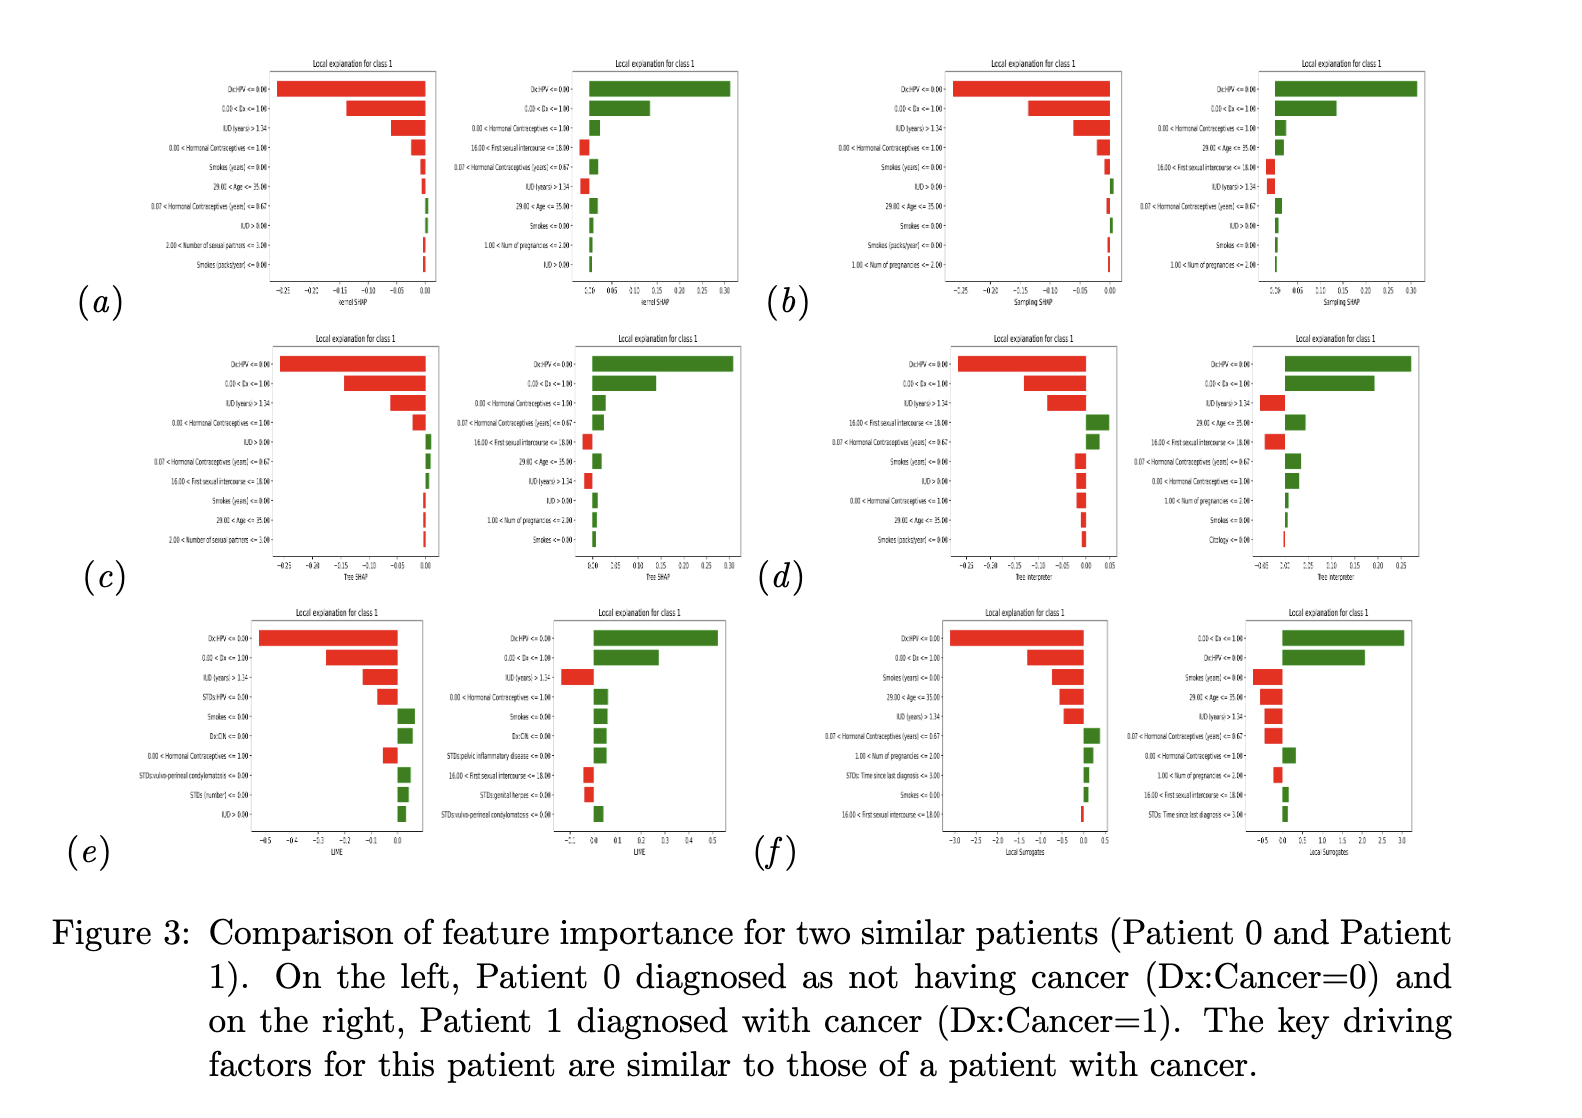

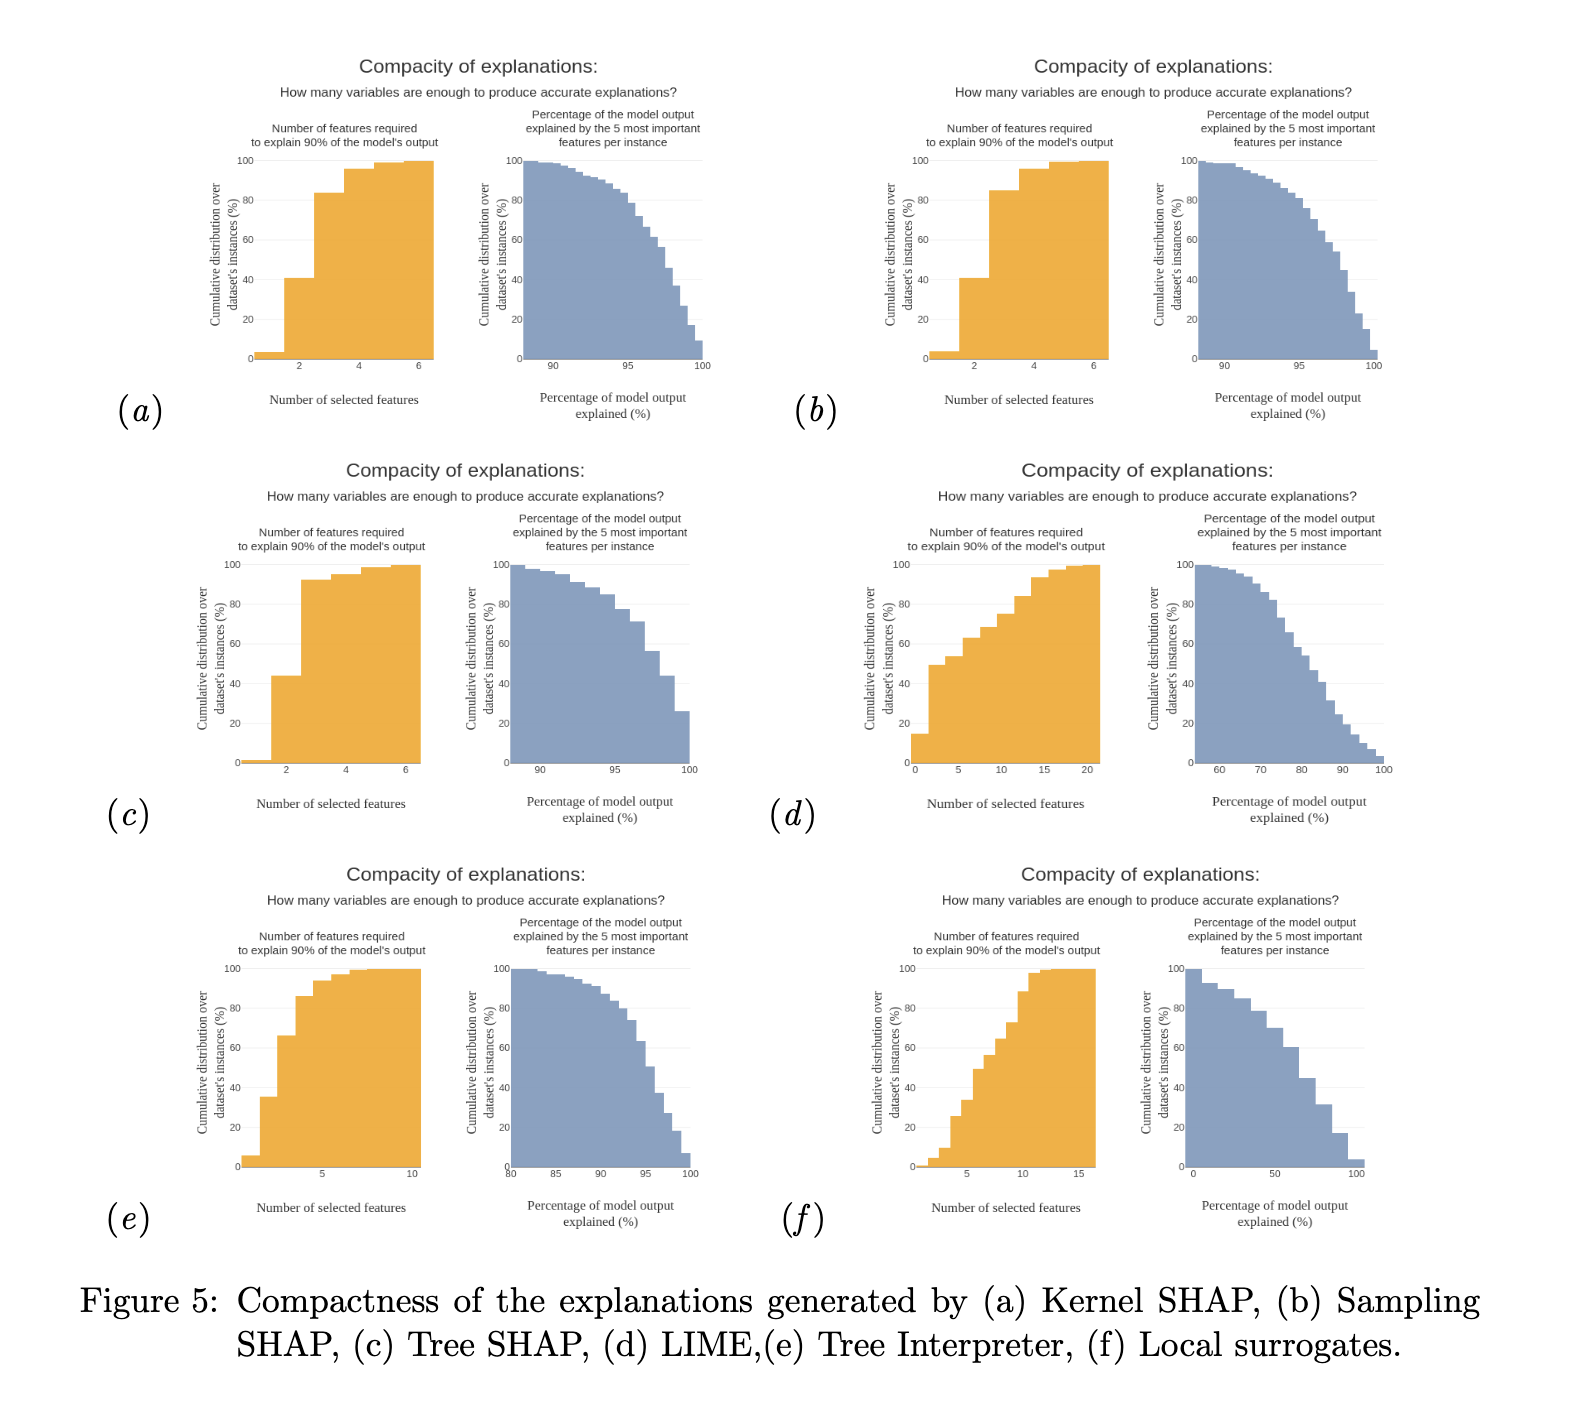

In [4]:
from google.colab import drive
drive.mount('/content/drive')

img_dir = '/content/drive/MyDrive/features.png'
img_dir2 = '/content/drive/MyDrive/methods.png'

import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
img = cv2.imread(img_dir)
img2 = cv2.imread(img_dir2)

cv2_imshow(img)
cv2_imshow(img2)

# Methodology

This is the core part of the project draft. Here we will go over four subsections **data**, **model**, **training** and **evaluation** in our experiment and analysis work so far.

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from typing import List
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from plotly.offline import plot, iplot, init_notebook_mode

import warnings
warnings.filterwarnings('ignore')


In [6]:
# !pip install psutil -U kaleido
# import plotly.io as pio

##  Data

The dataset comes with 36 columns and 859 rows. Among them we have 858 patients and 35 features, including demographic information such as age and number of pregnancies, clinical tests such as Hinselmann and Citology, sexually transmitted diseases such as HPV and AIDS, and diagnosis taken by the patients such as HPV and CIN. All the data formats in the dataset are numbers or string, and all structured data, so from a data size perspective the memory and computation needed for working with is feasible.

  * Source of the data:
  
  The dataset used in the paper is available from the UCI repository (Fernandes et al., 2017). It is open source, and also available on Kaggle which we could access and download directly at https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification?resource=download
  
  * Statistics:
  
  Here are the high-level subtopics we will cover in the code snippets below.

  1. ovreview of unique values of each column
  2. data distribution analysis, in the order of: top features correlated with cancer, Pregnancy Distribution by Age, Correlation of diagnoses,
  3. more in-depth data analysis, including number of sex partner by age buckets created, Proportions of women who have Cervical Cancer / HPV, Hormonal Contraceptives and Cervical Cancer.


  * Data process:

  Here are the high-level subtopics we will cover in the code snippets below.

  1. convert all features to numeric column types if they are not already
  2. bucket ages into 8 categories from "Child" to "70+"
  3. aggregating various different std columns into a "total_std" new col.
  4. dealing with imbalanced data
  5. create train/test dataset for later training and evaluation

  
  * Illustration:
  
  We will be printing results, plotting figures for illustration for each of the sub-Statistics and Data processing in order below.

### Statistics

In [7]:
# Data notes
# dir and function to load raw data
# raw_data_dir = '/content/gdrive/My Drive/Colab Notebooks/<path-to-raw-data>'
risk_factor_df = pd.read_csv('/content/drive/My Drive/kag_risk_factors_cervical_cancer.csv', delimiter=',', encoding='utf-8')
risk_factor_df.head()

# def load_raw_data(raw_data_dir):
#   # implement this function to load raw data to dataframe/numpy array/tensor
#   return None

# raw_data = load_raw_data(raw_data_dir)

# calculate statistics
def calculate_stats(raw_data):
  # implement this function to calculate the statistics
  # it is encouraged to print out the results
  return None

# process raw data
def process_data(raw_data):
    # implement this function to process the data as you need
  return None

# processed_data = process_data(raw_data)

''' you can load the processed data directly
processed_data_dir = '/content/gdrive/My Drive/Colab Notebooks/<path-to-raw-data>'
def load_processed_data(raw_data_dir):
  pass

'''
def print_unique_values_df(df: pd.DataFrame):
    for col in list(df):
        print("Unique Values for "'{}'":{}".format(str(col), risk_factor_df[col].unique()))
        print("dtype for {} is :{}".format(str(col), risk_factor_df[col].dtypes))
        print("-" * 150)


def print_unique_values_for_col(df: pd.DataFrame, col_names: List[str] = None):
    for col in col_names:
        print("Unique Values for "'{}'":{}".format(str(col), risk_factor_df[col].unique()))

print_unique_values_df(risk_factor_df)

Unique Values for Age:[18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
dtype for Age is :int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique Values for Number of sexual partners:['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' '?' '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']
dtype for Number of sexual partners is :object
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique Values for First sexual intercourse:['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']
dtype for First sexual intercourse is :object
----------------------------------------------------------------------------------------------------

In [8]:
# code comment is used as inline annotations for your coding
# risk_factor_df = pd.read_csv('/content/drive/My Drive/kag_risk_factors_cervical_cancer.csv', delimiter=',', encoding='utf-8')
risk_factor_df.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   
2                             0.0  0.0  ...                                ?   
3                             3.0  0.0  ...                                ?   
4                            15.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   
2                               ?         0      0      0  0          0   
3                               ?         1      0      1  0          0   
4                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  

[5 rows x 36 columns]

In [9]:
# 840 non HPV, 18 HPV

risk_factor_df[risk_factor_df['Dx:HPV'] == 1]
risk_factor_df['Dx:HPV'].value_counts()

0    840
1     18
Name: Dx:HPV, dtype: int64

In [10]:
# no nulls
risk_factor_df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [11]:
risk_factor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [12]:
risk_factor_df.describe()

Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

### Data Processing

In [13]:
#these columns are not of type object, but are of type numeric
cols_to_convert = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
                   'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
                   'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
                   'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                   'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                   'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
                   'STDs:HPV', 'STDs: Time since first diagnosis',
                   'STDs: Time since last diagnosis']
# for i in range(0,len(cols_to_convert)):
#     print("{}={}".format(i,cols_to_convert[i]))
risk_factor_df[cols_to_convert] = risk_factor_df[cols_to_convert].apply(pd.to_numeric, errors="coerce")
risk_factor_df[cols_to_convert].fillna(np.nan, inplace=True)
imp = SimpleImputer(strategy="median")
X = imp.fit_transform(risk_factor_df)
risk_factor_df = pd.DataFrame(X, columns=list(risk_factor_df.columns))


In [14]:
def age_cat(age):
    if age < 12:
        return "Child"
    elif age < 20:
        return "Teen"
    elif age < 30:
        return "20's"
    elif age < 40:
        return "30's"
    elif age < 50:
        return "40's"
    elif age < 60:
        return "50's"
    elif age < 70:
        return "60's"
    else:
        return "70+"


risk_factor_df["Age"] = risk_factor_df["Age"].astype(int)
risk_factor_df["age_cat"] = risk_factor_df["Age"].apply(age_cat)

In [15]:
std_cols = {'STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV'}

risk_factor_df["total_std"] = risk_factor_df[list(std_cols)].sum(axis=1)
std_agg = risk_factor_df.groupby("age_cat", as_index=False)[list(std_cols)].sum()

test_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
risk_factor_df["total_tests"] = risk_factor_df[test_cols].sum(axis = 1)

to_int_and_beyond = {"total_tests",
                     "total_std",
                     "Smokes",
                     "Biopsy",
                     "Dx:Cancer",
                     "Num of pregnancies",
                     "Number of sexual partners",
                     "First sexual intercourse",
                     "Hormonal Contraceptives",
                     "IUD",
                     "STDs",
                     "STDs (number)",
                     "STDs: Number of diagnosis",
                     "Dx:CIN",
                     "Dx:HPV",
                     "Dx",
                     "Hinselmann",
                     "Schiller",
                     "Biopsy",
                     "Citology"}

to_int_and_beyond = to_int_and_beyond.union(std_cols)

for col in to_int_and_beyond:
    risk_factor_df[col] = risk_factor_df[col].astype(int)

# risk_factor_df.info()



### Data Analysis

In [16]:
n = 7
target = label = "Dx:Cancer"
corr = risk_factor_df.select_dtypes(include=np.number).corr()

x = corr.nlargest(n,target).index
corr_df =  risk_factor_df[list(x)]
corr = corr_df.corr()
fig = px.imshow(corr,color_continuous_scale = "PuBu")
fig.update_layout(title="Top "+str(n)+" Features Correlated With "+str(target).capitalize())
fig.show()


In [17]:
def stats(x):
    temp1=(df[[x,label]].value_counts(normalize=True).round(decimals=3)*100).reset_index().rename(columns={0:'Overall_Percent'})
    Coloumn_To_Aggregate=[x,label]
    df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'),
                 df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
    df6['Category_Percent']=round((df6['ind_siz']/df6['Total'])*100 ,2)
    temp2=df6[[x,label,'Category_Percent']]
    temp3=temp1.merge(temp2,on=[x,label])
    return temp3.pivot(columns=x,index=label)

df=risk_factor_df
label='age_cat'

stats('Dx:Cancer')


Overall_Percent      Category_Percent       
Dx:Cancer               0    1                0      1
age_cat                                               
20's                 45.3  0.6            46.31  27.78
30's                 24.7  0.9            25.24  44.44
40's                  6.2  0.3             6.31  16.67
50's                  0.5  0.1             0.48   5.56
70+                   0.5  NaN             0.48    NaN
Teen                 20.7  0.1            21.19   5.56

In [18]:
age_dist = px.histogram(risk_factor_df, x="Age", marginal="box", color_discrete_sequence=["palevioletred"])
age_dist.update_layout(title="Age distribution")
age_dist.show()

In [19]:
age_preg_bar = px.box(risk_factor_df.sort_values(by="Age",ascending=True), x="age_cat", y="Num of pregnancies",
                      color_discrete_sequence=["darkblue"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties","Sixties",
                                       "Seventy and over"])
age_preg_bar.update_xaxes(title="Age Category")
age_preg_bar.update_yaxes(title="Number of Pregnancies")
age_preg_bar.update_layout(title="Distribution of number of pregnancies per age group")
age_preg_bar.show()


In [20]:
age_num_sex_partners = px.box(risk_factor_df.sort_values(by="Age",ascending=True), x="age_cat", y="Number of sexual partners",
                      color_discrete_sequence=["blue"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties",
                                       "Seventy and over"])
age_num_sex_partners.update_xaxes(title="Age Category")
age_num_sex_partners.update_yaxes(title="Number of Sexual Partners")
age_num_sex_partners.update_layout(title="Distribution of number of sexual partners per age group")
age_num_sex_partners.show()


In [21]:
age_num_sex_partners = px.scatter(risk_factor_df, x="Age",
                                  y="Number of sexual partners",
                                  trendline="ols",
                                  opacity=0.4,
                                  color="Num of pregnancies",
                                  color_continuous_scale="rdbu",)
age_num_sex_partners.update_layout(title="Age vs Number of Sexual Partners")
age_num_sex_partners.show()


In [22]:
# risk_factor_df.columns
# exclude_columns = ['age_cat', 'total_std']

# # Select columns excluding those in exclude_columns
# selected_columns = risk_factor_df.columns[~risk_factor_df.columns.isin(exclude_columns)]

In [23]:
label = 'Number of sexual partners'
diagnoses_cols = [label,
                  'Dx:CIN',
                  'Dx:HPV']
diagnoses_corr_matrix = risk_factor_df[diagnoses_cols].corr()
# print(diagnoses_corr_matrix)
diagnoses_heatmap = px.imshow(diagnoses_corr_matrix, aspect="auto", color_continuous_scale="tealgrn", text_auto=True)
diagnoses_heatmap.show()


In [24]:
fig = px.histogram(std_agg, x="age_cat", y=list(std_cols), barmode="group", histfunc="sum")
fig.update_layout(title="Sum of STD occurence across age categories")
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Sum")
fig.show()

In [25]:
age_num_sex_partners = px.box(risk_factor_df.sort_values(by="Age",ascending=True), x="age_cat", y="total_std",
                      color_discrete_sequence=["blue"], points="outliers",
                      category_orders=["Teenager", "Twenties", "Thirties", "Forties", "Fifties",
                                       "Seventy and over"])
age_num_sex_partners.update_xaxes(title="Age Category")
age_num_sex_partners.update_yaxes(title="Number of Sexual Partners")
age_num_sex_partners.update_layout(title="Distribution of number of sexual partners per age group")
age_num_sex_partners.show()


In [26]:
fig = px.histogram(risk_factor_df.query("total_std>=0").sort_values(by=["total_std", label], ascending=True),
                   x="age_cat",
                   facet_col="total_std",
                   facet_row=label,
                   color_discrete_sequence=["rebeccapurple"],
                   opacity=0.7)
fig.update_layout(title="Count of women across age groups who have had one or more std")

fig.show()


In [27]:
fig = px.histogram(risk_factor_df.query("total_std>=0").sort_values(by=["total_std","Dx:HPV"], ascending=True),
                   x="age_cat",
                   facet_col="total_std",
                   facet_row="Dx:HPV",
                   color_discrete_sequence=["dodgerblue"],
                   opacity=0.7)
fig.update_layout(title="Count of women across age groups who have had one or more std")

fig.show()


In [28]:
fig = px.histogram(risk_factor_df.query("total_tests>0").sort_values(by="total_tests", ascending=True),
                   x="age_cat",
                   facet_col="total_tests",
                   facet_row=label,
                   color_discrete_sequence=["blueviolet"],
                   opacity=0.8)
fig.update_layout(title="Count of women across age groups who have had one or more test")

fig.show()

In [29]:
fig = px.histogram(risk_factor_df.query("total_tests>0").sort_values(by=["total_tests","Dx:HPV"], ascending=True),
                   x="age_cat",
                   facet_col="total_tests",
                   facet_row="Dx:HPV",
                   color_discrete_sequence=["coral"],
                   opacity=0.8)
fig.update_layout(title="Count of women across age groups who have had one or more test")

fig.show()



In [30]:
fig = px.ecdf(risk_factor_df, x=["Smokes (years)",
                                 "Hormonal Contraceptives (years)",
                                 "IUD (years)"],
              color_discrete_sequence=["crimson", "deepskyblue", "chartreuse"])
fig.update_xaxes(title="Years")
fig.update_layout(title="ECDF Plot")
fig.show()

In [31]:
age_category_range = {
    "Age<12": "Child",
    "Age>=12 & Age<20": "Teen",
    "Age>=20 & Age<30": "20's",
    "Age>=30 & Age<40": "30's",
    "Age>=40 & Age<50": "40's",
    "Age>=50 & Age<60": "50's",
    "Age>=60 & Age<70": "60's",
    "Age>=70": "70+"}
age_prop_dict = {}
col = "Age"  # Just to get the count
for age_range, category in age_category_range.items():
    age_prop_dict[category] = risk_factor_df.query(age_range)[col].count() / len(risk_factor_df)

proportion_samples_df = pd.DataFrame.from_dict(age_prop_dict, orient="index",
                                               columns=[ "Sample Proportion"])
proportion_samples_df = proportion_samples_df.reset_index()
proportion_samples_df.columns = proportion_samples_df.columns.str.replace("index","Category")
fig = px.pie(proportion_samples_df,
             values='Sample Proportion',
             names="Category",
             title='Age Category proportion of women sampled',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
proportion_samples_df


Category  Sample Proportion
0    Child           0.000000
1     Teen           0.208625
2     20's           0.459207
3     30's           0.256410
4     40's           0.065268
5     50's           0.005828
6     60's           0.000000
7      70+           0.004662

In [32]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=["Cancer", "HPV"])
fig.add_trace(go.Pie(labels=risk_factor_df["age_cat"],
                     values=risk_factor_df[label],
                     name="Cancer", marker_colors=px.colors.sequential.RdBu),
              1, 1)
fig.add_trace(go.Pie(labels=risk_factor_df["age_cat"],
                     values=risk_factor_df["Dx:HPV"],
                     name="HPV", marker_colors=px.colors.sequential.RdBu),
              1, 2)

fig.update_traces(hole=.0, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Proportion of women across age categories with a diagnosis of Cancer, HPV",
)
fig.show()

In [33]:
df_hormonal_compariosn = risk_factor_df.groupby(["age_cat"], as_index=False)[["IUD", "Hormonal Contraceptives"]].sum()
fig = px.histogram(df_hormonal_compariosn, x="age_cat", y=["IUD", "Hormonal Contraceptives"], barmode="group"
                   , color_discrete_sequence=["darkcyan", "mediumorchid"])

fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Count")
fig.update_layout(title="Age Ranges of women who use Contraceptives")

fig.show()

In [34]:
df_hormonal_contraceptives = risk_factor_df[
    (risk_factor_df["Hormonal Contraceptives"] == 1) & (risk_factor_df["IUD"] == 0)]
df_hormonal_contraceptives = df_hormonal_contraceptives.sort_values(by=["Smokes", label])
fig = px.histogram(df_hormonal_contraceptives, x="age_cat", color="Smokes", barmode="group", facet_col=label,
                   color_discrete_sequence=["darkcyan", "crimson"])
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Count")
fig.update_layout(title="Age Ranges of women who use Hormonal Contraceptives")
# fig.for_each_annotation(lambda a: a.update(text=a.text.split(":")[-1]))
fig.show()



In [35]:


df_IUD_contraceptives = risk_factor_df[(risk_factor_df["Hormonal Contraceptives"] == 0) & (risk_factor_df["IUD"] == 1)]
df_IUD_contraceptives = df_IUD_contraceptives.sort_values(by=["Smokes", label], ascending=True)
fig = px.histogram(df_IUD_contraceptives, x="age_cat", color="Smokes", barmode="group", facet_col=label,
                   color_discrete_sequence=["darkcyan", "crimson"])
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Sum of IUD Usage across age category")
fig.update_layout(title="Age Ranges of women who use IUD's")
fig.show()



In [36]:
df_both_contraceptives = risk_factor_df[(risk_factor_df["Hormonal Contraceptives"] == 1) & (risk_factor_df["IUD"] == 1)]
df_both_contraceptives = df_both_contraceptives.sort_values(by="Smokes")
fig = px.histogram(df_both_contraceptives, x="age_cat", color="Smokes", barmode="group", facet_col=label,
                   color_discrete_sequence=["darkcyan", "crimson"])
fig.update_xaxes(title="Age Category")
fig.update_yaxes(title="Count")
fig.update_layout(title="Age Ranges of women who use BOTH Hormonal Contracepties and IUD's")
fig.show()


### Test / Train Split

In [37]:
test=risk_factor_df[['Number of sexual partners',	'First sexual intercourse',	'Num of pregnancies',	'Smokes','Dx','Hormonal Contraceptives', 'total_std', 'total_tests', 'age_cat']].groupby('age_cat').mean()

with open('summary.tex','w') as tf:
    tf.write(test.round(2).to_latex())

risk_factor_df.columns



Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy', 'age_cat', 'total_std', 'total_tests'],
      dtype='object')

In [38]:
label="Dx:Cancer"

dx_cancer = px.histogram(risk_factor_df, y=label)
dx_cancer.update_layout(bargap=0.2)
dx_cancer.update_layout(title = "Imbalanced Classes")
dx_cancer.show()

X = risk_factor_df.drop([label, "age_cat"], axis=1)
y = risk_factor_df[label].copy()



In [39]:
adasyn = ADASYN(random_state=42)
x_adasyn,y_adasyn = adasyn.fit_resample(X,y)
risk_factor_df = x_adasyn.join(y_adasyn)

# ros = RandomOverSampler(random_state=42)
# x_ros, y_ros = ros.fit_resample(X, y)
# risk_factor_df = x_ros.join(y_ros)

risk_factor_df["age_cat"] = risk_factor_df["Age"].apply(age_cat)

dx_cancer = px.histogram(risk_factor_df, y=label)
dx_cancer.update_layout(bargap=0.2)
dx_cancer.update_layout(title = "Balanced Classes")
dx_cancer.show()



In [40]:
rain_set = None
test_set = None
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(risk_factor_df, risk_factor_df["age_cat"]):
    train_set = risk_factor_df.loc[train_idx]
    test_set = risk_factor_df.loc[test_idx]
cols_to_drop = ["age_cat","total_std","total_tests"]
for set_ in (train_set, test_set):
    for col in cols_to_drop:
        set_.drop(col, axis=1, inplace=True)


In [41]:
X_train = train_set.drop(label, axis=1)
y_train = train_set[label].copy()

X_test = test_set.drop(label, axis=1)
y_test = test_set[label].copy()

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

len(X_test.columns)

35

In [42]:
## saving the data into csv for reuse
# Without random var

X_test.to_csv('/content/drive/My Drive/X_test.csv')
y_test.to_csv('/content/drive/My Drive/y_test.csv')
X_train.to_csv('/content/drive/My Drive/X_train.csv')
y_train.to_csv('/content/drive/My Drive/y_train.csv')

# With random var
# Binary

X_test.to_csv('/content/drive/My Drive/RX_test2.csv')
y_test.to_csv('/content/drive/My Drive/Ry_test2.csv')
X_train.to_csv('/content/drive/My Drive/RX_train2.csv')
y_train.to_csv('/content/drive/My Drive/Ry_train2.csv')

# Continuous

X_test.to_csv('/content/drive/My Drive/RX_test.csv')
y_test.to_csv('/content/drive/My Drive/Ry_test.csv')
X_train.to_csv('/content/drive/My Drive/RX_train.csv')
y_train.to_csv('/content/drive/My Drive/Ry_train.csv')



##   Model


Ayad et al used 5 different model architectures that have widely been used in prior literature for cervical cancer risk assessment - namely Logistic Regression (LR), Random Forest (RF), Support Vector Machine (SVM), k-Nearest Neighbors (KNN), and Multilayer Perceptron (MLP).


These models often show high variance and lack interpretability, so Ayad et al generated local explanations for each of them, and compared the explanations generated with the set of bench evaluation metrics, and summarized the approach for assessing the quality of different explanations with their algorithm for assessing local feature contribution.


The model includes the model definitation which usually is a class, model training, and other necessary parts.
  * Model architecture: layer number/size/type, activation function, etc
  * Training objectives: loss function, optimizer, weight of each loss term, etc
  * Others: whether the model is pretrained, Monte Carlo simulation for uncertainty analysis, etc
  * The code of model should have classes of the model, functions of model training, model validation, etc.
  * If your model training is done outside of this notebook, please upload the trained model here and develop a function to load and test it.

In [43]:
# class my_model():
#   # use this class to define your model
#   pass

# model = my_model()
# loss_func = None
# optimizer = None

# def train_model_one_iter(model, loss_func, optimizer):
#   pass

# num_epoch = 10
# # model training loop: it is better to print the training/validation losses during the training
# for i in range(num_epoch):
#   train_model_one_iter(model, loss_func, optimizer)
#   train_loss, valid_loss = None, None
#   print("Train Loss: %.2f, Validation Loss: %.2f" % (train_loss, valid_loss))


### Logistic regression

In [44]:
param_grid = {'C': np.logspace(-5, 8, 15)}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=10,refit=True).fit(X_train,y_train)
logreg_cv = LogisticRegression(**logreg_cv.best_params_)

### random forrest

In [45]:
rnd_clf = RandomForestClassifier()

### KNN

In [46]:
knn_clf = KNeighborsClassifier()
knn_param_grid = {"n_neighbors": list(np.arange(1, 100, 2))}
knn_clf_cv = GridSearchCV(knn_clf, knn_param_grid, cv=10,refit=True).fit(X_train,y_train)
knn_clf_cv = KNeighborsClassifier(**knn_clf_cv.best_params_)

### SVC

In [47]:
svm_clf = SVC()
svc_param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), }
svm_clf_cv = GridSearchCV(svm_clf, svc_param_grid, cv=5)

### MLP

In [48]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier()

In [49]:

# # Add a random variable
# # Binary

# from scipy.stats import bernoulli

# risk_factor_df['VAR_b']=bernoulli.rvs(.5, size=risk_factor_df.shape[0])

# # Continuous

# risk_factor_df['VAR_c']=np.random.normal(loc=0, scale=1, size=risk_factor_df.shape[0])

# risk_factor_df.columns



In [50]:
# from scipy.stats import bernoulli

# X_test['VARB']=bernoulli.rvs(.5, size=X_test.shape[0])
# X_train['VARB']=bernoulli.rvs(.5, size=X_train.shape[0])
# X_test['VARC']=bernoulli.rvs(.5, size=X_test.shape[0])
# X_train['VARC']=bernoulli.rvs(.5, size=X_train.shape[0])


In [51]:
# for col in X_test.columns:
#   X_test[col]+=np.random.normal(loc=0, scale=.1, size=X_test.shape[0])
#   X_train[col]+=np.random.normal(loc=0, scale=.1, size=X_train.shape[0])


In [52]:
# from scipy.stats import bernoulli

#binary
# X_test['VAR']=bernoulli.rvs(.5, size=X_test.shape[0])
# X_train['VAR']=bernoulli.rvs(.5, size=X_train.shape[0])



# continous
# X_test['VAR']=np.random.normal(loc=0, scale=1, size=X_test.shape[0])
# X_train['VAR']=np.random.normal(loc=0, scale=1, size=X_train.shape[0])



## Training

This section we fit the five models mentioned in the Model section above. From the model architecture perspective, all the models that the paper uses are all regular supervised models and can reasonably train and eval within hours on a laptop computation power, so also feasible on that front. So the dataset is workable for our applications without needing to downsampling.




In [53]:
#nn_clf.fit(X_train, y_train)

col_names = ["Classifier Name", "Accuracy Score", "Precision Score",
             "Recall Score", "F1 Score", "AUROC"]
summary_df = pd.DataFrame(columns=col_names)

est_name = []
est_acc = []
precision_score = []
recall_score = []
f1score = []
est_conf_matrix = []
roc=[]

estimators = [
    ("LogisticRegression", logreg_cv),
    ("RandomForestClassifier ", rnd_clf),
    ("KNeighborsClassifier", knn_clf_cv),
    ("SupportVectorClassifier", svm_clf_cv),
    ("MLPClassifier", nn_clf)]


In [54]:
for i in range(0, len(estimators)):
    clf_name = estimators[i][0]
    clf = estimators[i][1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #print(pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["predicted"],margins=True))
    roc.append(roc_auc_score(y_test, y_pred, average=None))
    print('roc',roc)
    est_name.append(estimators[i][0])
    est_acc.append(accuracy_score(y_test, y_pred))
    scores = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    print('scores de '+str(clf_name), scores)
    precision_score.append(scores[0])
    recall_score.append(scores[1])
    f1score.append(scores[2])
    est_conf_matrix.append(confusion_matrix(y_test,y_pred))

roc [1.0]
scores de LogisticRegression (1.0, 1.0, 1.0, None)
roc [1.0, 1.0]
scores de RandomForestClassifier  (1.0, 1.0, 1.0, None)
roc [1.0, 1.0, 0.9628571428571429]
scores de KNeighborsClassifier (0.9642001915708812, 0.9613095238095238, 0.961313979066094, None)
roc [1.0, 1.0, 0.9628571428571429, 0.9971428571428572]
scores de SupportVectorClassifier (0.9970421810699589, 0.9970238095238095, 0.997024152746606, None)
roc [1.0, 1.0, 0.9628571428571429, 0.9971428571428572, 0.9971428571428572]
scores de MLPClassifier (0.9970421810699589, 0.9970238095238095, 0.997024152746606, None)


In [55]:
summary_df[col_names[0]] = est_name
summary_df[col_names[1]] = est_acc
summary_df[col_names[2]] = precision_score
summary_df[col_names[3]] = recall_score
summary_df[col_names[4]] = f1score
summary_df[col_names[5]] = roc



In [56]:
estimators

[('LogisticRegression', LogisticRegression(C=1389495.494373136)),
 ('RandomForestClassifier ', RandomForestClassifier()),
 ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=1)),
 ('SupportVectorClassifier',
  GridSearchCV(cv=5, estimator=SVC(),
               param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                           'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})),
 ('MLPClassifier', MLPClassifier())]

## Evaluation

For evaluation, we will go over the base suites of metrics, for each model:
1. confusion matrix
    - the counts of true positives, true negatives, false positives, and false negatives.
2. accuracy
    - how many total predictions did the model get right
3. precision
    - true positives rate by mode out of all positive predictions
4. recall
    - true positives that were correctly identified by the model out of all actual positives.
5. F1
    - harmonic mean of precision and recall
6. AUC
    - the area under the Receiver Operating Characteristic (ROC) curve, which measures the model's ability to discriminate between positive and negative classes across different threshold values.

Later in the section we compare each model with others in visualization of the metrics aboves

We also plan to use the standard precision, recall, and RemOve And Retrain (ROAR) (Hooker et al., 2018) mentioned in the paper for the faithfulness metric, where we will iteratively remove a subset of features from a dataset, and retrain the model on the reduced dataset to measure the changes in model accuracy or feature importance in each iteration, which will come later in the Results Analysis subsection.



In [58]:
color_scales = ["agsunset","teal","purp","viridis","viridis"]
for i in range(0,len(est_conf_matrix)):
    heatmap = px.imshow(est_conf_matrix[i],aspect="auto",
                        text_auto=True,
                        color_continuous_scale=color_scales[i])
    heatmap.update_layout(title = est_name[i])
    heatmap.update_xaxes(title="Predicted")
    heatmap.update_yaxes(title="Actual")
    heatmap.show()


In [59]:
summary_df

Classifier Name  Accuracy Score  Precision Score  Recall Score  \
0       LogisticRegression        1.000000         1.000000      1.000000   
1  RandomForestClassifier         1.000000         1.000000      1.000000   
2     KNeighborsClassifier        0.961310         0.964200      0.961310   
3  SupportVectorClassifier        0.997024         0.997042      0.997024   
4            MLPClassifier        0.997024         0.997042      0.997024   

   F1 Score     AUROC  
0  1.000000  1.000000  
1  1.000000  1.000000  
2  0.961314  0.962857  
3  0.997024  0.997143  
4  0.997024  0.997143

In [60]:
# px.colors.sequential.RdBu
#https://plotly.com/python/error-bars/
#https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars/
acc_comparison = px.bar(summary_df, x="Classifier Name",
                        y=col_names[1:len(col_names)], labels={"value":"Test Accuracy", "variable":"Metrics"}, text_auto=True,
                        color_discrete_sequence=["deeppink",
                                                 "deepskyblue",
                                                 "darkviolet",
                                                 "darkorange",
                                                 "darkred"],
                        barmode="group"
                        #,error_y=[dict(type='data', array=[0.5, 1, 2],visible=True), dict(type='data', array=[0.5, 1, 2]), dict(type='data', array=[0.5, 1, 2],visible=True), dict(type='data', array=[0.5,1]), dict(type='data', array=[0.5, 1, 2, 2, 1])]
                        #,error_y_minus = [dict(type='data', array=[0.5, 1, 2, 2, 1],visible=True), dict(type='data', array=[0.5, 1, 2]), dict(type='data', array=[2, 1]), dict(type='data', array=[0.5,1]), dict(type='data', array=[0.5, 1, 2, 2, 1])]
                        )
acc_comparison.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})
acc_comparison.show()

# acc_comparison.write_image('/content/drive/My Drive/modelsperf.png')


# Results

Now that we finished training the model for Cervical Cancer risk factor prediction, we want to look into how locally explanables they each are to aid the healthcare process of diagnosis.


The models are evaluated to be pretty great, as noted right above, they score perfect in accuracy, and high in precision, recall, f1, and AUORC. Using MLP model as an example, the model achieved 0.997024 in accuracy, 0.997042 for precision, 0.997024 for recall, 0.997143 for AUC. Now how reliable are these models really in serving real-world cancer risk factor prediction?

In this section we will go over the Local Explanability results and analyses, and briefly go over our plan for the rest of the project time that we will continue to work on post this draft submission.



#### Explainability results

In [61]:
# Local methods

# Generate local FI

# !pip install shap
# !pip install lime
# !pip install interpret-community
# !pip install alibi
# !pip install treeinterpreter
# !pip install SALib
# !pip install dice-ml
# !pip install pip install spectralcluster
# !pip install -U kaleido

In [62]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from interpret_community.mimic.mimic_explainer import MimicExplainer
from interpret_community.mimic.models import LinearExplainableModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from interpret.blackbox import MorrisSensitivity
import shap
import lime
from lime import lime_tabular
from treeinterpreter import treeinterpreter as ti

import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import random

In [63]:
GloSur=kernelSHAP=treeSHAP=samplingSHAP=limecontrib=ticontrib=dicecontrib=pd.DataFrame([[0.0]*X_test.shape[1]]*X_test.shape[0], columns=X_test.columns)
fi_1=fi_2=fi_3=fi_4=fi_5=fi_6=fi_7={f'{x}':0.0 for x in X_test.columns}

model = nn_clf

res = dict()
features=X_test.columns

In [64]:
exclude_columns = ['VARB', 'VARC', 'VAR']

# Select columns excluding those in exclude_columns
features = X_test.columns[~X_test.columns.isin(exclude_columns)]

In [65]:
print("-GLOSUR-")
# GloSur
explainer = MimicExplainer(model,
                          X_train[features],
                          LinearExplainableModel,
                          augment_data=False,
                          features=features,
                          model_task="classification")
global_explanation = explainer.explain_global(X_test[features])
temp=pd.DataFrame(global_explanation.local_importance_values[1], columns=features)
GloSur=GloSur.add(temp, fill_value=0)


res = dict()
res = global_explanation.get_feature_importance_dict()
fi_1={k: fi_1.get(k, 0) + res.get(k, 0) for k in set(fi_1)}


-GLOSUR-


In [66]:
# print("-KSHAP-")
# # KSHAP
# explainer = shap.KernelExplainer(model.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# temp=pd.DataFrame(shap_values[1], columns=features)
# kernelSHAP=kernelSHAP.add(temp, fill_value=0)

# res = dict()
# for i in list(kernelSHAP.columns):
#   res[i]=np.mean(np.abs(kernelSHAP[i]))
# fi_2={k: fi_2.get(k, 0) + res.get(k, 0) for k in set(fi_2)}
# really slow to run

In [67]:
# print("-TSHAP-")
# # TSHAP
# explainer = shap.TreeExplainer(model,X_train)
# shap_values = explainer.shap_values(X_test)

# temp=pd.DataFrame(shap_values[1], columns=features)
# treeSHAP=treeSHAP.add(temp, fill_value=0)

# res = dict()
# for i in list(treeSHAP.columns):
#   res[i]=np.mean(np.abs(treeSHAP[i]))
# fi_3={k: fi_3.get(k, 0) + res.get(k, 0) for k in set(fi_3)}


In [68]:
print("-SSHAP-")
# SSHAP
explainer = shap.explainers.Sampling(model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
temp=pd.DataFrame(shap_values[1], columns=features)
samplingSHAP=samplingSHAP.add(temp, fill_value=0)

res = dict()
for i in list(samplingSHAP.columns):
  res[i]=np.mean(np.abs(samplingSHAP[i]))
fi_4={k: fi_4.get(k, 0) + res.get(k, 0) for k in set(fi_4)}

-SSHAP-


  0%|          | 0/336 [00:00<?, ?it/s]

In [69]:
print("-LIME-")

# LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,mode='classification',feature_names=X_test.columns)

all=[]
for i in range (len(X_test)):
  exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba, num_features=X_test.shape[1])
  all.append(sorted(exp.as_map()[1]))


all_res=[]
for i in range(len(all)):
  res = dict()
  for j in range(len(all[0])):
    res[features[j]] = all[i][j][1]
  all_res.append(res)

temp=pd.DataFrame(all_res, columns=features)
limecontrib=limecontrib.add(temp, fill_value=0)

res = dict()
for j in list(limecontrib.columns):
  res[j]=np.mean(np.abs(limecontrib[j]))
fi_5={k: fi_5.get(k, 0) + res.get(k, 0) for k in set(fi_5)}


-LIME-


In [2]:
# print("-DICE-")
# import dice_ml
# df=risk_factor_df
# d = dice_ml.Data(dataframe=df, continuous_features=list(X_test.columns), outcome_name=label)
# m = dice_ml.Model(model=model, backend="sklearn")

# exp = dice_ml.Dice(d, m, method="random")
# query_instance = X_test
# e1 = exp.generate_counterfactuals(query_instance, total_CFs=10, desired_range=None,
#                                   desired_class="opposite",
#                                   permitted_range=None, features_to_vary="all")

# imp = exp.local_feature_importance(query_instance, posthoc_sparsity_param=None)
# dicecontrib=pd.DataFrame.from_dict(imp.local_importance)

# res = dict()
# for j in list(dicecontrib.columns):
#   res[j]=np.mean(np.abs(dicecontrib[j]))
# fi_7={k: fi_7.get(k, 0) + res.get(k, 0) for k in set(fi_7)}

In [71]:
res

{'Age': 0.05478741581076661,
 'Number of sexual partners': 0.020373274215737223,
 'First sexual intercourse': 0.027395499708499062,
 'Num of pregnancies': 0.025703293084869093,
 'Smokes': 0.2682359087067908,
 'Smokes (years)': 0.1888831409462688,
 'Smokes (packs/year)': 0.17768843073881263,
 'Hormonal Contraceptives': 0.10349758437167045,
 'Hormonal Contraceptives (years)': 0.04206428462594364,
 'IUD': 0.07064987998543601,
 'IUD (years)': 0.15508139298275814,
 'STDs': 0.02577736303723636,
 'STDs (number)': 0.06749160942678899,
 'STDs:condylomatosis': 0.11466246856142194,
 'STDs:cervical condylomatosis': 0.0,
 'STDs:vaginal condylomatosis': 0.052943594187400876,
 'STDs:vulvo-perineal condylomatosis': 0.12140552171841196,
 'STDs:syphilis': 0.12575384267839157,
 'STDs:pelvic inflammatory disease': 0.07021053835007887,
 'STDs:genital herpes': 0.07396533873349494,
 'STDs:molluscum contagiosum': 0.0791510627351735,
 'STDs:AIDS': 0.0,
 'STDs:HIV': 0.10917638771414036,
 'STDs:Hepatitis B': 0.0

In [ ]:

# GloSur.to_csv("/content/drive/My Drive/glosur.csv", index=False)
# kernelSHAP.to_csv("/content/drive/My Drive/Kshap.csv", index=False)
# #treeSHAP.to_csv("/content/drive/My Drive/Tshap.csv", index=False)
# samplingSHAP.to_csv("/content/drive/My Drive/Sshap.csv", index=False)
# limecontrib.to_csv("/content/drive/My Drive/lime.csv", index=False)
# #ticontrib.to_csv("/content/drive/My Drive/ti.csv", index=False)
# dicecontrib.to_csv("/content/drive/My Drive/dice.csv", index=False)



### Analyses

Here we aggregate all the local explanations we generated for each of the model and explanation methods. Each produced a dataframe of feature importance of predicting the risk outcome of cervical cancer.
The paper identified a set of most important features for assessing cervical cancer risk, we plan to rotate and systematically remove the top 30% most important features one by one and see if the model performance will have degradation, with the hope that it will help us understand the impact of specific features in determining cervical cancer, and analyze the five model's robustness or sensitivity to changes in the experiment.


In [73]:
dics = []

fi_1['Method'] = 'Surrogates'
dics.append(fi_1)
fi_2['Method'] = 'KSHAP'
dics.append(fi_2)
fi_3['Method'] = 'TSHAP'
dics.append(fi_3)
fi_4['Method'] = 'SSHAP'
dics.append(fi_4)
fi_5['Method'] = 'LIME'
dics.append(fi_5)
fi_6['Method'] = 'TI'
dics.append(fi_6)
fi_7['Method'] = 'DICE'
dics.append(fi_7)


dics = pd.DataFrame(dics)
methods=dics['Method']
dics['Method']=methods
dics.to_csv("/content/drive/My Drive/dics_1.csv", index=False)

In [82]:
dics

Smokes (years)  STDs (number)  STDs:pelvic inflammatory disease       Age  \
0        0.691009       0.023605                          0.000000  0.570522   
1        0.000000       0.000000                          0.000000  0.000000   
2        0.000000       0.000000                          0.000000  0.000000   
3        0.033802       0.001697                          0.000024  0.024584   
4        0.188883       0.067492                          0.070211  0.054787   
5        0.000000       0.000000                          0.000000  0.000000   
6        0.000000       0.000000                          0.000000  0.000000   

     Biopsy  Hormonal Contraceptives (years)  STDs:cervical condylomatosis  \
0  0.003037                         0.436398                           0.0   
1  0.000000                         0.000000                           0.0   
2  0.000000                         0.000000                           0.0   
3  0.000926                         0.017731                           0.0   
4  0.013362                         0.042064                           0.0   
5  0.000000                         0.000000                           0.0   
6  0.000000                         0.000000                           0.0   

   STDs:HIV  STDs:HPV        Dx  ...  STDs:AIDS  \
0  0.001460  0.000000  1.978655  ...        0.0   
1  0.000000  0.000000  0.000000  ...        0.0   
2  0.000000  0.000000  0.000000  ...        0.0   
3  0.000857  0.000132  0.185292  ...        0.0   
4  0.109176  0.166753  0.439218  ...        0.0   
5  0.000000  0.000000  0.000000  ...        0.0   
6  0.000000  0.000000  0.000000  ...        0.0   

   STDs:vulvo-perineal condylomatosis  Hinselmann  Number of sexual partners  \
0                            0.012938    0.024621                   0.048681   
1                            0.000000    0.000000                   0.000000   
2                            0.000000    0.000000                   0.000000   
3                            0.001783    0.001533                   0.003291   
4                            0.121406    0.062271                   0.020373   
5                            0.000000    0.000000                   0.000000   
6                            0.000000    0.000000                   0.000000   

   STDs:condylomatosis  IUD (years)  Hormonal Contraceptives    Dx:CIN  \
0             0.002614     0.735653                 0.158987  0.029276   
1             0.000000     0.000000                 0.000000  0.000000   
2             0.000000     0.000000                 0.000000  0.000000   
3             0.001475     0.057261                 0.025055  0.002521   
4             0.114662     0.155081                 0.103498  0.269239   
5             0.000000     0.000000                 0.000000  0.000000   
6             0.000000     0.000000                 0.000000  0.000000   

       STDs      Method  
0  0.001639  Surrogates  
1  0.000000        DICE  
2  0.000000        DICE  
3  0.000794       SSHAP  
4  0.025777        LIME  
5  0.000000        DICE  
6  0.000000        DICE  

[7 rows x 36 columns]

In [74]:
all_fi = dics
all_fi.fillna(0, inplace=True)
all_fi.iloc[:,:-1]=np.abs(all_fi.iloc[:,:-1])
all_fi.reset_index(drop=True, inplace=True)


methods=all_fi['Method'].to_list()
weights=[GloSur, kernelSHAP, samplingSHAP, limecontrib, dicecontrib]

In [76]:
GloSur

Age  Number of sexual partners  First sexual intercourse  \
0   -0.554033                  -0.112369                 -0.026319   
1    0.014206                  -0.014657                 -0.026319   
2   -0.198884                   0.034199                 -0.026319   
3   -0.554033                   0.034199                 -0.092116   
4    0.440385                  -0.014657                  0.105275   
..        ...                        ...                       ...   
331 -0.411973                   0.034199                  0.039478   
332 -0.269914                  -0.014657                  0.105275   
333 -1.335362                   0.034199                  0.171072   
334 -0.554033                  -0.063513                  0.039478   
335 -0.554033                  -0.112369                 -0.026319   

     Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
0              0.248043  0.119635       -0.688855             0.008948   
1              0.248043  0.119635       -0.688855             0.008948   
2              0.248043  0.119635       -0.688855             0.008948   
3              0.248043  0.119635       -0.688855             0.008948   
4              0.248043 -1.076716       -0.141089             0.004311   
..                  ...       ...             ...                  ...   
331            0.248043  0.119635       -0.688855             0.008948   
332           -0.744128 -1.076716        0.406676             0.007093   
333            0.744128  0.119635       -0.688855             0.008948   
334            0.248043  0.119635       -0.688855             0.008948   
335            0.248043  0.119635       -0.688855             0.008948   

     Hormonal Contraceptives  Hormonal Contraceptives (years)       IUD  ...  \
0                   0.317973                        -0.192906  0.000000  ...   
1                  -0.035330                        -0.467631 -0.356363  ...   
2                  -0.035330                        -0.273355 -0.356363  ...   
3                  -0.035330                         0.359219  0.000000  ...   
4                   0.317973                        -0.526384  0.000000  ...   
..                       ...                              ...       ...  ...   
331                -0.035330                         0.612248  0.000000  ...   
332                 0.317973                        -0.526384  0.000000  ...   
333                 0.317973                        -0.526384  0.000000  ...   
334                -0.035330                        -0.198322  0.000000  ...   
335                 0.317973                        -0.249600  0.000000  ...   

     STDs: Number of diagnosis  STDs: Time since first diagnosis  \
0                          0.0                         -0.001543   
1                          0.0                         -0.001543   
2                          0.0                         -0.001543   
3                          0.0                         -0.001543   
4                          0.0                         -0.001543   
..                         ...                               ...   
331                        0.0                         -0.001543   
332                        0.0                         -0.001543   
333                        0.0                         -0.001543   
334                        0.0                         -0.001543   
335                        0.0                         -0.001543   

     STDs: Time since last diagnosis  Dx:CIN    Dx:HPV        Dx  Hinselmann  \
0                           0.143938     0.0  2.135690  3.069787         0.0   
1                           0.143938     0.0 -3.203535  3.069787         0.0   
2                           0.143938     0.0 -3.203535 -1.315623         0.0   
3                           0.143938     0.0 -3.203535 -1.315623         0.0   
4                           0.143938     0.0 -3.203535 -1.315623         0.0   
..                    

In [77]:
kernelSHAP

Age  Number of sexual partners  First sexual intercourse  \
0    0.0                        0.0                       0.0   
1    0.0                        0.0                       0.0   
2    0.0                        0.0                       0.0   
3    0.0                        0.0                       0.0   
4    0.0                        0.0                       0.0   
..   ...                        ...                       ...   
331  0.0                        0.0                       0.0   
332  0.0                        0.0                       0.0   
333  0.0                        0.0                       0.0   
334  0.0                        0.0                       0.0   
335  0.0                        0.0                       0.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   0.0     0.0             0.0                  0.0   
1                   0.0     0.0             0.0                  0.0   
2                   0.0     0.0             0.0                  0.0   
3                   0.0     0.0             0.0                  0.0   
4                   0.0     0.0             0.0                  0.0   
..                  ...     ...             ...                  ...   
331                 0.0     0.0             0.0                  0.0   
332                 0.0     0.0             0.0                  0.0   
333                 0.0     0.0             0.0                  0.0   
334                 0.0     0.0             0.0                  0.0   
335                 0.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                        0.0                              0.0  0.0  ...   
1                        0.0                              0.0  0.0  ...   
2                        0.0                              0.0  0.0  ...   
3                        0.0                              0.0  0.0  ...   
4                        0.0                              0.0  0.0  ...   
..                       ...                              ...  ...  ...   
331                      0.0                              0.0  0.0  ...   
332                      0.0                              0.0  0.0  ...   
333                      0.0                              0.0  0.0  ...   
334                      0.0                              0.0  0.0  ...   
335                      0.0                              0.0  0.0  ...   

     STDs: Number of diagnosis  STDs: Time since first diagnosis  \
0                          0.0                               0.0   
1                          0.0                               0.0   
2                          0.0                               0.0   
3                          0.0                               0.0   
4                          0.0                               0.0   
..                         ...                               ...   
331                        0.0                               0.0   
332                        0.0                               0.0   
333                        0.0                               0.0   
334                        0.0                               0.0   
335                        0.0                               0.0   

     STDs: Time since last diagnosis  Dx:CIN  Dx:HPV   Dx  Hinselmann  \
0                                0.0     0.0     0.0  0.0         0.0   
1                                0.0     0.0     0.0  0.0         0.0   
2                                0.0     0.0     0.0  0.0         0.0   
3                                0.0     0.0     0.0  0.0         0.0   
4                                0.0     0.0     0.0  0.0         0.0   
..                               ...     ...     ...  ...         ...   
331                              0.0     0.0     0.0  0.0         0.0   
332                              0.0     0.0     0.0  0.0

In [78]:
samplingSHAP

Age  Number of sexual partners  First sexual intercourse  \
0    0.003530                  -0.007144                 -0.008059   
1    0.034117                  -0.000340                 -0.002150   
2    0.005105                   0.000866                 -0.000717   
3   -0.015931                   0.002320                 -0.010264   
4    0.013928                  -0.003248                  0.003791   
..        ...                        ...                       ...   
331 -0.008771                   0.002575                  0.002041   
332  0.008955                  -0.002582                  0.000060   
333 -0.064155                   0.001011                  0.019818   
334  0.005135                  -0.001690                  0.005338   
335  0.008570                  -0.004711                 -0.001903   

     Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
0              0.000582  0.016175       -0.020187             0.005484   
1              0.011293  0.020569       -0.009904            -0.002616   
2              0.000257  0.000025       -0.016398             0.003184   
3              0.002579  0.007484       -0.021510             0.003640   
4              0.008231 -0.172198        0.095506            -0.026514   
..                  ...       ...             ...                  ...   
331            0.000695  0.008223       -0.020169            -0.000167   
332           -0.046124 -0.172417        0.110410            -0.006795   
333            0.011782  0.001460       -0.019123            -0.000168   
334            0.006634  0.016874       -0.017238             0.007723   
335            0.007978  0.022626       -0.027418             0.000354   

     Hormonal Contraceptives  Hormonal Contraceptives (years)       IUD  ...  \
0                   0.036892                         0.014332  0.006463  ...   
1                  -0.022103                        -0.009885 -0.040920  ...   
2                  -0.022982                         0.003048 -0.021181  ...   
3                  -0.019971                         0.026288  0.005596  ...   
4                   0.023725                        -0.025501  0.004840  ...   
..                       ...                              ...       ...  ...   
331                -0.019249                         0.028548  0.001770  ...   
332                 0.017638                        -0.009175  0.005904  ...   
333                 0.022536                        -0.021850  0.009962  ...   
334                -0.018359                         0.010435  0.006479  ...   
335                 0.037693                         0.014524  0.007077  ...   

     STDs: Number of diagnosis  STDs: Time since first diagnosis  \
0                 4.092379e-11                          0.000397   
1                 1.182398e-03                          0.000021   
2                 2.159426e-05                          0.000129   
3                 2.571033e-05                          0.000583   
4                 1.222566e-06                          0.000041   
..                         ...                               ...   
331               6.429673e-06                         -0.000341   
332               1.582573e-05                         -0.001094   
333               5.522275e-06                          0.000135   
334               2.280252e-04                          0.000024   
335               2.798818e-04                         -0.000011   

     STDs: Time since last diagnosis    Dx:CIN    Dx:HPV        Dx  \
0                           0.000690  0.002634  0.245007  0.204097   
1                           0.002781  0.000000 -0.093425  0.345136   
2                           0.001789  0.000000 -0.244393 -0.204448   
3                           0.000796  0.000000 -0.244023 -0.198491   
4                           0.007187  0.002484 -0.212408 -0.180180   
..                               ...       ...       ...       ...   
331         

In [79]:
limecontrib

Age  Number of sexual partners  First sexual intercourse  \
0    0.000328                  -0.017003                  0.008783   
1    0.043672                   0.001982                  0.009414   
2    0.042447                   0.024446                  0.005563   
3    0.002944                   0.017486                 -0.014570   
4    0.069138                   0.000993                  0.033841   
..        ...                        ...                       ...   
331 -0.002873                   0.024156                  0.008391   
332  0.053471                  -0.008048                  0.037956   
333 -0.111065                   0.011109                  0.043487   
334 -0.016064                  -0.052732                  0.007145   
335 -0.003862                  -0.036915                  0.002820   

     Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
0              0.020998  0.256379       -0.192050             0.188822   
1              0.014600  0.259647       -0.183518             0.184216   
2              0.026736  0.266055       -0.195469             0.167712   
3              0.010403  0.274756       -0.190716             0.181888   
4              0.009556 -0.249597        0.200148            -0.182206   
..                  ...       ...             ...                  ...   
331            0.019495  0.255597       -0.191625             0.161903   
332           -0.067385 -0.271954        0.179016            -0.180678   
333            0.040939  0.257762       -0.179450             0.166274   
334            0.016374  0.269565       -0.182994             0.178543   
335            0.025680  0.285565       -0.188553             0.180705   

     Hormonal Contraceptives  Hormonal Contraceptives (years)       IUD  ...  \
0                   0.093057                         0.004360  0.056503  ...   
1                  -0.103359                        -0.036137 -0.063246  ...   
2                  -0.096094                         0.003588 -0.077193  ...   
3                  -0.095187                         0.079266  0.075985  ...   
4                   0.112640                        -0.051727  0.065160  ...   
..                       ...                              ...       ...  ...   
331                -0.093219                         0.079676  0.074736  ...   
332                 0.103341                        -0.064769  0.078856  ...   
333                 0.095747                        -0.050959  0.062996  ...   
334                -0.099579                         0.005642  0.069249  ...   
335                 0.111959                         0.005854  0.057851  ...   

     STDs: Number of diagnosis  STDs: Time since first diagnosis  \
0                     0.012729                          0.032331   
1                     0.023647                          0.025612   
2                     0.015260                          0.005703   
3                     0.039060                          0.039944   
4                    -0.008188                          0.019409   
..                         ...                               ...   
331                   0.016879                          0.042213   
332                   0.041858                          0.048166   
333                   0.034966                          0.051784   
334                   0.042087                          0.025834   
335                   0.014795                          0.023146   

     STDs: Time since last diagnosis    Dx:CIN    Dx:HPV        Dx  \
0                           0.115727  0.277814  0.493450  0.442080   
1                           0.144427  0.300076 -0.488503  0.448620   
2                           0.125468  0.346522 -0.492979 -0.441636   
3                           0.153598  0.285891 -0.508123 -0.437785   
4                           0.126323  0.246444 -0.482785 -0.435524   
..                               ...       ...       ...       ...   
331         

In [80]:
dicecontrib

Age  Number of sexual partners  First sexual intercourse  \
0    0.0                        0.0                       0.0   
1    0.0                        0.0                       0.0   
2    0.0                        0.0                       0.0   
3    0.0                        0.0                       0.0   
4    0.0                        0.0                       0.0   
..   ...                        ...                       ...   
331  0.0                        0.0                       0.0   
332  0.0                        0.0                       0.0   
333  0.0                        0.0                       0.0   
334  0.0                        0.0                       0.0   
335  0.0                        0.0                       0.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   0.0     0.0             0.0                  0.0   
1                   0.0     0.0             0.0                  0.0   
2                   0.0     0.0             0.0                  0.0   
3                   0.0     0.0             0.0                  0.0   
4                   0.0     0.0             0.0                  0.0   
..                  ...     ...             ...                  ...   
331                 0.0     0.0             0.0                  0.0   
332                 0.0     0.0             0.0                  0.0   
333                 0.0     0.0             0.0                  0.0   
334                 0.0     0.0             0.0                  0.0   
335                 0.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                        0.0                              0.0  0.0  ...   
1                        0.0                              0.0  0.0  ...   
2                        0.0                              0.0  0.0  ...   
3                        0.0                              0.0  0.0  ...   
4                        0.0                              0.0  0.0  ...   
..                       ...                              ...  ...  ...   
331                      0.0                              0.0  0.0  ...   
332                      0.0                              0.0  0.0  ...   
333                      0.0                              0.0  0.0  ...   
334                      0.0                              0.0  0.0  ...   
335                      0.0                              0.0  0.0  ...   

     STDs: Number of diagnosis  STDs: Time since first diagnosis  \
0                          0.0                               0.0   
1                          0.0                               0.0   
2                          0.0                               0.0   
3                          0.0                               0.0   
4                          0.0                               0.0   
..                         ...                               ...   
331                        0.0                               0.0   
332                        0.0                               0.0   
333                        0.0                               0.0   
334                        0.0                               0.0   
335                        0.0                               0.0   

     STDs: Time since last diagnosis  Dx:CIN  Dx:HPV   Dx  Hinselmann  \
0                                0.0     0.0     0.0  0.0         0.0   
1                                0.0     0.0     0.0  0.0         0.0   
2                                0.0     0.0     0.0  0.0         0.0   
3                                0.0     0.0     0.0  0.0         0.0   
4                                0.0     0.0     0.0  0.0         0.0   
..                               ...     ...     ...  ...         ...   
331                              0.0     0.0     0.0  0.0         0.0   
332                              0.0     0.0     0.0  0.0

In [83]:
methods # todo fix me
weights=[GloSur, dicecontrib, dicecontrib, samplingSHAP, limecontrib, dicecontrib, dicecontrib]

In [84]:
instance=291
var='W'
maxx=10
f=''

one_instance=[]

for i in range(len(methods)):
  one_instance.append(weights[i].iloc[instance])

one_instance=pd.DataFrame(one_instance, columns=X_test.columns)
one_instance['methods']=methods
one_instance.set_index('methods', inplace=True)

one_instance.to_csv('/content/drive/My Drive/one_instance.csv')

print('methods' in one_instance.columns)

one_instance

False


Age  Number of sexual partners  First sexual intercourse  \
methods                                                                     
Surrogates -0.554033                   0.034199                  0.236869   
DICE        0.000000                   0.000000                  0.000000   
DICE        0.000000                   0.000000                  0.000000   
SSHAP       0.005352                   0.002953                  0.025960   
LIME       -0.002815                   0.023132                  0.048514   
DICE        0.000000                   0.000000                  0.000000   
DICE        0.000000                   0.000000                  0.000000   

            Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
methods                                                                         
Surrogates           -0.248043  0.119635       -0.688855             0.008948   
DICE                  0.000000  0.000000        0.000000             0.000000   
DICE                  0.000000  0.000000        0.000000             0.000000   
SSHAP                 0.003540  0.019518       -0.015715             0.009623   
LIME                 -0.008781  0.267751       -0.201849             0.169636   
DICE                  0.000000  0.000000        0.000000             0.000000   
DICE                  0.000000  0.000000        0.000000             0.000000   

            Hormonal Contraceptives  Hormonal Contraceptives (years)  \
methods                                                                
Surrogates                 0.317973                        -0.418126   
DICE                       0.000000                         0.000000   
DICE                       0.000000                         0.000000   
SSHAP                      0.031976                        -0.007541   
LIME                       0.107547                         0.008095   
DICE                       0.000000                         0.000000   
DICE                       0.000000                         0.000000   

                 IUD  ...  STDs: Number of diagnosis  \
methods               ...                              
Surrogates  0.000000  ...                   0.000000   
DICE        0.000000  ...                   0.000000   
DICE        0.000000  ...                   0.000000   
SSHAP       0.001325  ...                   0.001092   
LIME        0.058659  ...                   0.049569   
DICE        0.000000  ...                   0.000000   
DICE        0.000000  ...                   0.000000   

            STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
methods                                                                         
Surrogates                         -0.001543                         0.143938   
DICE                                0.000000                         0.000000   
DICE                                0.000000                         0.000000   
SSHAP                               0.001459                         0.000502   
LIME                                0.011616                         0.150679   
DICE                                0.000000                         0.000000   
DICE                                0.000000                         0.000000   

             Dx:CIN    Dx:HPV        Dx  Hinselmann  Schiller  Citology  \
methods                                                                   
Surrogates  0.00000  2.135690  3.069787    0.000000  0.000000  0.000000   
DICE        0.00000  0.000000  0.000000    0.000000  0.000000  0.000000   
DICE        0.00000  0.000000  0.000000    0.000000  0.000000  0.000000   
SSHAP       0.00000  0.230255  0.201126    0.000005 -0.000810  0.000767   
LIME        0.27067  0.498883  0.435217    0.041224 -0.006767  0.065281   
DICE        0.00000  0.000000  0.000000    0.000000  0.000000  0.000000   
DICE        0.00000  0.000000  0.000000    0.000000  0.000000  0.000000   

              Biopsy  
methods   

In [85]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,

In [1]:
# ## gscontrib

# explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,mode='classification',feature_names=X_test.columns)
# exp = explainer.explain_instance(X_test.iloc[instance], model.predict_proba, num_features=X_test.shape[1])

# items = gscontrib.iloc[instance].to_dict()
# t = []
# count=0
# for i, item in enumerate(items):
#   if abs(items[item]) > 0.0 :
#     t.append((i, items[item]))

# t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

# exp_test = {1: t[0:maxx]}


# exp.local_exp = exp_test
# exp.show_in_notebook(show_table=False,show_predicted_value=False)



In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()
plt.xlabel("Local Surrogates")
fig.savefig('/content/drive/My Drive/'+str(var)+'surrogate'+str(instance)+str(f)+'.png', bbox_inches='tight')


In [ ]:
## kercontrib
items = kercontrib.iloc[instance].to_dict()
t = []
count=0
for i, item in enumerate(items):
  if abs(items[item]) > 0.0 :
    t.append((i, items[item]))

t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

exp_test = {1: t[0:maxx]}


exp.local_exp = exp_test
exp.show_in_notebook(show_table=False,show_predicted_value=False)

%matplotlib inline
fig = exp.as_pyplot_figure()
plt.xlabel("kernel SHAP")
fig.savefig('/content/drive/My Drive/'+str(var)+'kernelSHAP'+str(instance)+str(f)+'.png', bbox_inches='tight')



In [ ]:
## trecontrib

items = trecontrib.iloc[instance].to_dict()
t = []
count=0
for i, item in enumerate(items):
  if abs(items[item]) > 0.0 :
    t.append((i, items[item]))

t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

exp_test = {1: t[0:maxx]}


exp.local_exp = exp_test
exp.show_in_notebook(show_table=True,show_predicted_value=False)

%matplotlib inline
fig = exp.as_pyplot_figure()
plt.xlabel("Tree SHAP")
fig.savefig('/content/drive/My Drive/'+str(var)+'treeSHAP'+str(instance)+str(f)+'.png', bbox_inches='tight')



In [ ]:
### samcontrib
items = samcontrib.iloc[instance].to_dict()
t = []
count=0
for i, item in enumerate(items):
  if abs(items[item]) > 0.0 :
    t.append((i, items[item]))

t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

exp_test = {1: t[0:maxx]}


exp.local_exp = exp_test
exp.show_in_notebook(show_table=True,show_predicted_value=False)

%matplotlib inline
fig = exp.as_pyplot_figure()
plt.xlabel("Sampling SHAP")
fig.savefig('/content/drive/My Drive/'+str(var)+'samplingSHAP'+str(instance)+str(f)+'.png', bbox_inches='tight')



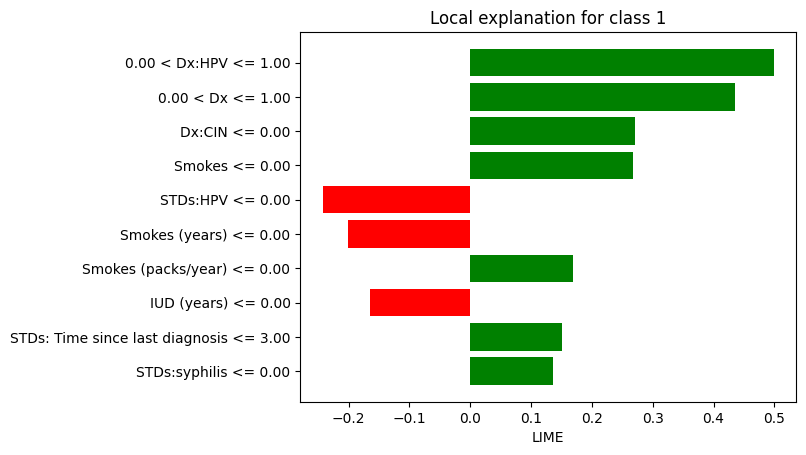

In [87]:
### lime

items = limecontrib.iloc[instance].to_dict()
t = []
count=0
for i, item in enumerate(items):
  if abs(items[item]) > 0.0 :
    t.append((i, items[item]))

t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

exp_test = {1: t[0:maxx]}


exp.local_exp = exp_test
exp.show_in_notebook(show_table=True,show_predicted_value=False)

%matplotlib inline
fig = exp.as_pyplot_figure()
plt.xlabel("LIME")
fig.savefig('/content/drive/My Drive/'+str(var)+'lime'+str(instance)+str(f)+'.png', bbox_inches='tight')



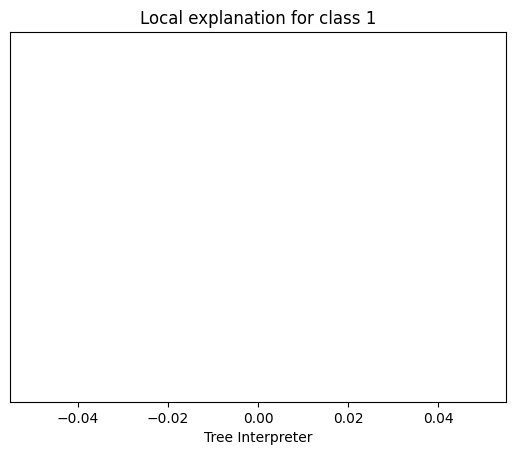

In [88]:
### ticontrib

items = ticontrib.iloc[instance].to_dict()
t = []
count=0
for i, item in enumerate(items):
  if abs(items[item]) > 0.0 :
    t.append((i, items[item]))

t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

exp_test = {1: t[0:maxx]}


exp.local_exp = exp_test
exp.show_in_notebook(show_table=False,show_predicted_value=False)

%matplotlib inline
fig = exp.as_pyplot_figure()
plt.xlabel("Tree Interpreter")
fig.savefig('/content/drive/My Drive/'+str(var)+'ti'+str(instance)+str(f)+'.png', bbox_inches='tight')



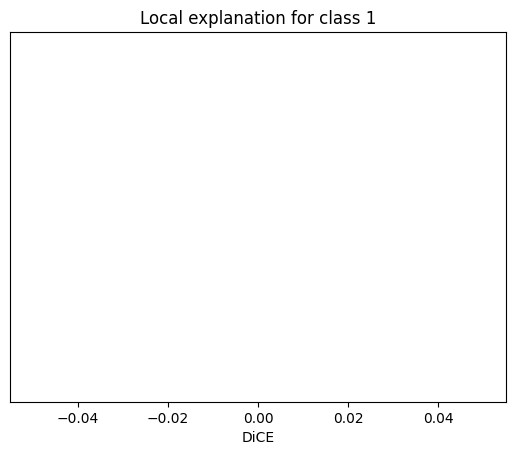

In [89]:
### dice

items = dicecontrib.iloc[instance].to_dict()
t = []
count=0
for i, item in enumerate(items):
  if abs(items[item]) > 0.0 :
    t.append((i, items[item]))

t = sorted(t, key=lambda tup: abs(tup[1]),  reverse=True)

exp_test = {1: t[0:maxx]}


exp.local_exp = exp_test
exp.show_in_notebook(show_table=False,show_predicted_value=False)

%matplotlib inline
fig = exp.as_pyplot_figure()
plt.xlabel("DiCE")
fig.savefig('/content/drive/My Drive/'+str(var)+'dice'+str(instance)+str(f)+'.png', bbox_inches='tight')

In [123]:
### ROAR

from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score

def roar(featImp, feature_to_predict, datapath, savepath, dataname):

  a=['ro--', 'go--', 'mo--', 'yo--', 'co--', 'ko--', 'bo--']
  pourc=[0,10,20,30,40,60,70,90]
  font = {'size'   : 14}

  plt.rc('font', **font)

  df = datapath
  X = df[list(df.columns.drop([feature_to_predict, 'age_cat']))]
  y = df[feature_to_predict]

  for k in range(featImp.shape[0]):
    accuracies=[]
    new=[]
    for i in pourc:

      fi= featImp.iloc[k,:]
      fi.drop('Method', inplace=True)
      fi=fi.to_dict()
      fi=dict(sorted(fi.items(), key=lambda x:x[1], reverse=True))

      fii=list(fi.keys())

      # df= pd.read_csv(datapath)


      top=int((len(df.columns)*i)/100)
      fii = fii[top:]

      #df.drop(fii[0:top], axis=1, inplace=True)
      new=fii
      new.append(feature_to_predict)
      df = datapath
      df=df[new]


      model = RandomForestClassifier(random_state = 42)
      # model.fit(X, y)
      scores = cross_val_score(model, X, y, cv=10)
      accuracies.append(np.mean(scores))

    plt.plot(pourc, accuracies, a[k], label=featImp['Method'][k])


  plt.xlabel('% removed features for Cervical cancer risk factors')


  plt.ylabel('Accuracy')
  plt.legend(loc='upper right')
  plt.savefig(savepath+'roar.png', bbox_inches='tight', dpi=300)
  plt.show()


In [116]:
# risk_factor_df.head()
# risk_factor_df[label]
# (risk_factor_df[list(risk_factor_df.columns.drop(label))])
X=risk_factor_df[list(risk_factor_df.columns.drop([label, 'age_cat']))]
y=np.array(risk_factor_df[label])

model = RandomForestClassifier(random_state = 42)
model.fit(X, y)

scores = cross_val_score(model, X, y, cv=10)

In [109]:
scores

array([0.95238095, 0.99404762, 1.        , 1.        , 0.99404762,
       1.        , 1.        , 1.        , 1.        , 1.        ])

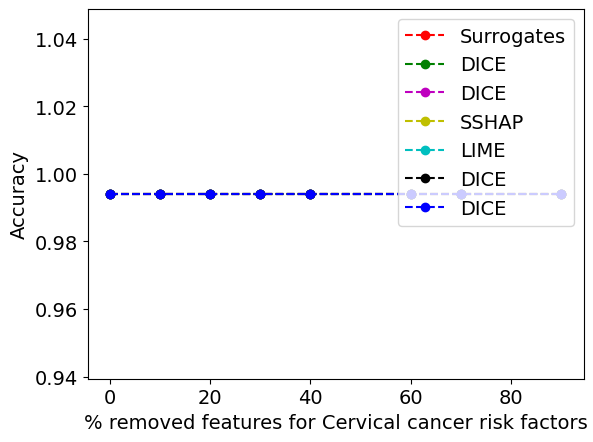

In [124]:
datapath= risk_factor_df #'/content/drive/My Drive/kag_risk_factors_cervical_cancer.csv'
savepath= '/content/drive/My Drive/'
dataname='Cervical cancer'

roar(all_fi, label, datapath, savepath, dataname)

### Plan

Our plan for the remaining work include the following two main areas, post the draft work submission:

1. Feature contributions plot, computing, measuring, and benchmarking Consistency, Compactness, and Stability of the local explanations generated with each method.

2. Validate Feature and Rank disagreement shown in the paper, and see if we reproduce the same feature and rank agreement distribution among the key explanation methods like visualized in the original paper.

# References

#### Main work:

Ayad, C. W., Bonnier, T., Bosch, B., Read, J., & Parbhoo, S. (2023). Which Explanation Makes Sense? A Critical Evaluation of Local Explanations for Assessing Cervical Cancer Risk Factors.


#### Local method reference:


Kelwin Fernandes, Jaime S Cardoso, and Jessica Fernandes. Transfer learning with partial observability applied to cervical cancer screening. In Pattern Recognition and Image Analysis: 8th Iberian Conference, IbPRIA 2017, Faro, Portugal, June 20-23, 2017, Proceedings 8, pages 243–250. Springer, 2017.

Sara Hooker, Dumitru Erhan, Pieter-Jan Kindermans, and Been Kim. A Benchmark for
Interpretability Methods in Deep Neural Networks, June 2018


